<a href="https://colab.research.google.com/github/LeVuPhuoc/AI-Robotics/blob/main/nhandienanhcanhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import thư viện


In [92]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
import cv2
import pickle

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle

# 2. Lấy data

In [ ]:
#get data
with open('data.pickle', 'rb') as k:
  (x_train, y_train) = pickle.load(k)

# Reshape Data
x_pre = x_train[30]
x1 = x_train[55]
x_train = x_train[:194]
y_train = y_train[:194]
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# 3. Cấu hình và train ảnh

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 3)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (67500,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2)


Epoch 1/100
2/2 [==============================] - 1s 187ms/step - loss: 0.6872 - acc: 0.3898 - val_loss: 0.6209 - val_acc: 0.5333
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 0.6248 - acc: 0.4407 - val_loss: 0.5700 - val_acc: 0.5333
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5865 - acc: 0.4407 - val_loss: 0.5308 - val_acc: 0.5333
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.5611 - acc: 0.4407 - val_loss: 0.5040 - val_acc: 0.5333
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 0.5449 - acc: 0.4407 - val_loss: 0.4883 - val_acc: 0.5333
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5398 - acc: 0.4407 - val_loss: 0.4789 - val_acc: 0.5333
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.5325 - acc: 0.4407 - val_loss: 0.4710 - val_acc: 0.5333
Epoch 8/100
2/2 [==============================] - 0s 28ms/step - loss: 0.5241 - acc: 0.4

# 4. Kiểm tra lại

(150, 150, 3)


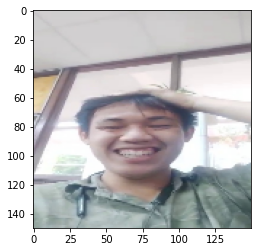

In [ ]:
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB))
print(x_pre.shape)
img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255

img1 = x1.reshape(1,-1)
img1 = img1.astype('float32')
img1 /= 255

0
Nguoi trong anh khong phai Phuoc


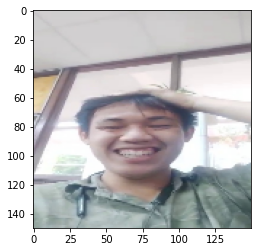

In [ ]:
k = np.argmax(model.predict(img))
print(k)
if k ==0:
  print('Nguoi trong anh khong phai Phuoc')
if k == 1:
 print('Nguoi trong anh la Phuoc')

plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

1
Nguoi trong anh la Phuoc


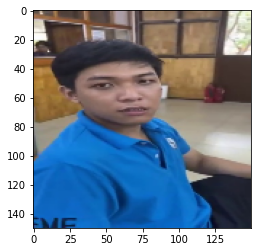

In [ ]:
k1 = np.argmax(model.predict(img1))
print(k1)
if k1 == 0:
  print('Nguoi trong anh khong phai Phuoc')
if k1 == 1:
 print('Nguoi trong anh la Phuoc')

plt.imshow(cv2.cvtColor(x1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [ ]:
model.save('nhandiencanhan.h5')